In [1]:
import numpy as np
import cv2

from tensorflow.keras.layers import Conv2D, ReLU
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.optimizers import SGD

In [2]:
def get_SRCnn() -> Model:
    model = Sequential()
    model.add(Conv2D(filters=128,
                     kernel_size=(9, 9),
                     padding="same"))
    model.add(ReLU())
    model.add(Conv2D(filters=64,
                     kernel_size=(1, 1),
                     padding="same"))
    model.add(ReLU())
    model.add(Conv2D(filters=3,
                     kernel_size=(5, 5),
                     padding="same"))
    return model


In [3]:
srcnn = get_SRCnn()
srcnn.build(input_shape=(None, 128, 128, 3))
srcnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 128)     31232     
_________________________________________________________________
re_lu (ReLU)                 (None, 128, 128, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      8256      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 128, 128, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 3)       4803      
Total params: 44,291
Trainable params: 44,291
Non-trainable params: 0
_________________________________________________________________


In [4]:
def load_data() -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    x_train = x_train[:5000]
    x_test  = x_test[:500]

    y_train = np.array([cv2.resize(i, (128, 128),
                                   interpolation=cv2.INTER_CUBIC) for i in x_train]) / 255.
    y_test = np.array([cv2.resize(i, (128, 128),
                                   interpolation=cv2.INTER_CUBIC) for i in x_test]) / 255.

    x_train = np.array([cv2.resize(i, (128, 128),
                                   interpolation=cv2.INTER_NEAREST) for i in x_train]) / 255.
    x_test = np.array([cv2.resize(i, (128, 128),
                                  interpolation=cv2.INTER_NEAREST) for i in x_test]) / 255.

    return x_train, y_train, x_test, y_test



In [5]:
def train(model: Model, epochs: int = 20):
    x_train, y_train, x_test, y_test = load_data()
    sgd = SGD(learning_rate=0.01, momentum=0.9, nesterov=True, decay=0.01 / epochs)
    model.compile(optimizer=sgd,
                  loss="mse",
                  metrics=["acc"])
    history = model.fit(x_train, y_train, batch_size=64, epochs=epochs,
                        validation_split=0.2, verbose=1)
    score = model.evaluate(x_test, y_test, verbose=2)

    print(f"test loss:{score[0]}  test mse:{score[1]}")
    return history

In [6]:
record = train(srcnn, 50)

Epoch 1/50
63/63 [==============================] - 24s 257ms/step - loss: 0.0162 - acc: 0.6003 - val_loss: 0.0050 - val_acc: 0.7337
Epoch 2/50
63/63 [==============================] - 14s 218ms/step - loss: 0.0037 - acc: 0.7582 - val_loss: 0.0025 - val_acc: 0.7868
Epoch 3/50
63/63 [==============================] - 14s 217ms/step - loss: 0.0020 - acc: 0.8016 - val_loss: 0.0016 - val_acc: 0.8234
Epoch 4/50
63/63 [==============================] - 14s 217ms/step - loss: 0.0014 - acc: 0.8357 - val_loss: 0.0011 - val_acc: 0.8515
Epoch 5/50
63/63 [==============================] - 14s 217ms/step - loss: 0.0011 - acc: 0.8577 - val_loss: 9.2317e-04 - val_acc: 0.8662
Epoch 6/50
63/63 [==============================] - 14s 218ms/step - loss: 8.7886e-04 - acc: 0.8659 - val_loss: 7.8906e-04 - val_acc: 0.8739
Epoch 7/50
63/63 [==============================] - 14s 218ms/step - loss: 7.6491e-04 - acc: 0.8707 - val_loss: 6.9512e-04 - val_acc: 0.8731
Epoch 8/50
63/63 [==============================]

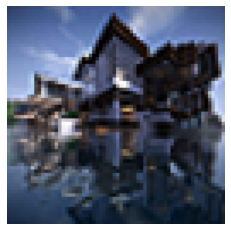

In [65]:
import matplotlib.pyplot as plt

img = cv2.imread(r"C:\Users\10248\Desktop\test.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (128, 128),
                 interpolation=cv2.INTER_NEAREST)  # (36,36,3)->(128,128,3)


plt.imshow(img)
plt.axis("off")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


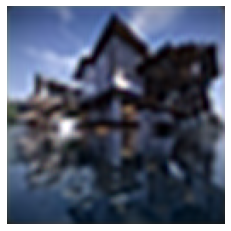

In [66]:
img = np.reshape(img, (1, 128, 128, 3)) / 255.
img_SR = srcnn.predict(img)
plt.imshow(img_SR[0])
plt.axis("off")
plt.show()